# CPSC 330 - Applied Machine Learning 

## Homework 6: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, November 15, 2021 at 11:59pm**

## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [1]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    plot_confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn import set_config


<br><br>

## Instructions 
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). 

**You may work on this homework in a group and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this homework, you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 
4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If you end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (4-10 hours) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Understanding the problem <a name="1"></a>
<hr>
rubric={points:4}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

1) Given various demographic details about Taiwanese credit card holders between April-September 2005, we have to create machine learning model that can accurately predict whether a person would default their credit card payment or not. We are given demographic (age, sex, marital status, etc) and behaviour data (payment status, payment amount, bill amount, etc). I think this dataset has all the relevant features needed to predict the target of defaulting or not.

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv", encoding="utf-8")
print(df)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train and test portions. 

In [3]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
print(train_df)
# print(test_df)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
16395  16396   320000.0    2          1         2   36      0      0      0   
21448  21449   440000.0    2          1         2   30     -1     -1     -1   
20034  20035   160000.0    2          3         1   44     -2     -2     -2   
25755  25756   120000.0    2          2         1   30      0      0      0   
1438    1439    50000.0    1          2         2   54      1      2      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
28636  28637   380000.0    2          2         1   37      0      0      0   
17730  17731   360000.0    2          1         1   54      1     -2     -2   
28030  28031    50000.0    2          3         1   29      0      0      0   
15725  15726    30000.0    2          2         2   21      0      0      0   
19966  19967   370000.0    2          1         1   36     -2     -2     -2   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

In [4]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                  

This summary clearly shows that no column in the training set requires imputation since there are 21000 non-null values for all columns. 
Also every column appears to be either int64 or float64 type (no object type)

In [5]:
# numeric features = limit_bal, age, bill_amt#, pay_amt#
print(train_df.describe(include="all"))

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  21000.000000    21000.000000  21000.000000  21000.000000  21000.000000   
mean   14962.348238   167880.651429      1.600762      1.852143      1.554000   
std     8650.734050   130202.682167      0.489753      0.792961      0.521675   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7498.750000    50000.000000      1.000000      1.000000      1.000000   
50%    14960.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22458.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean      35.500810     -0.015429     -0.137095     -0.171619     -0.225238   
std        9.212644      1.120465

This shows the wide range in values between numerical columns. For example, LIMIT_BAL has a max value of 1 million while age 
has a max of 79 and max of PAY_AMT5 is about half a million.

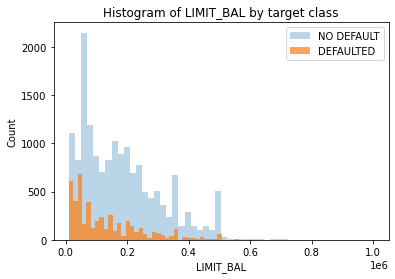

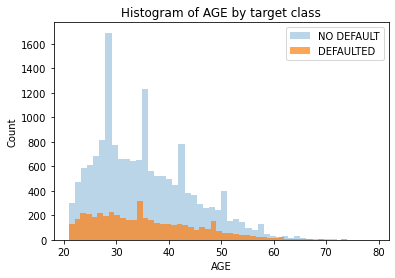

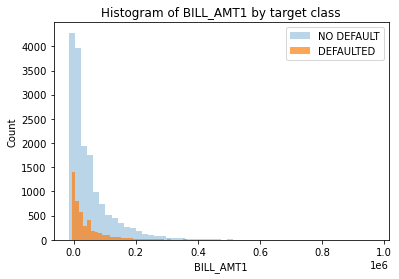

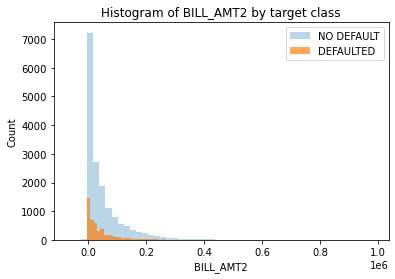

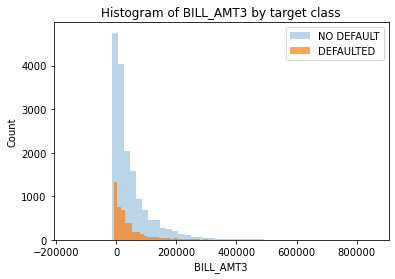

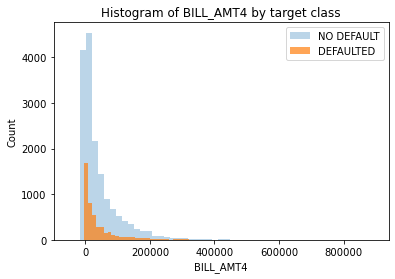

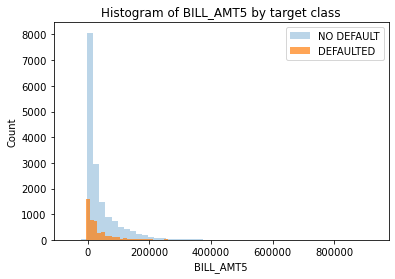

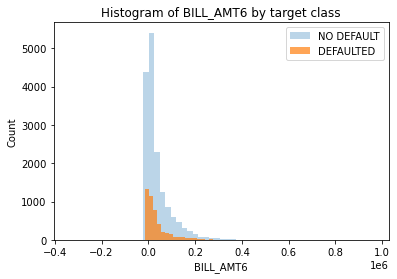

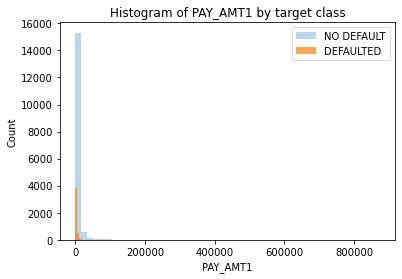

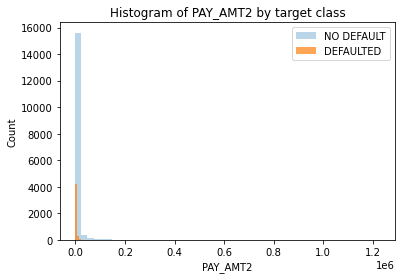

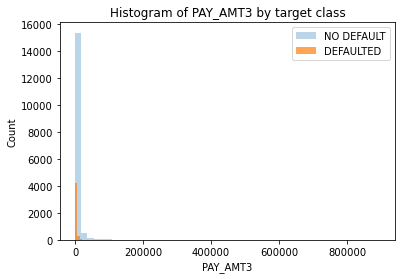

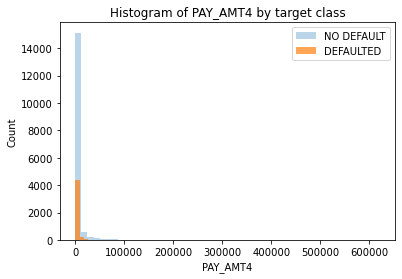

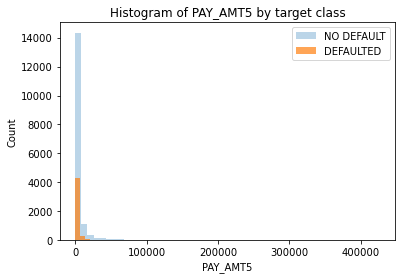

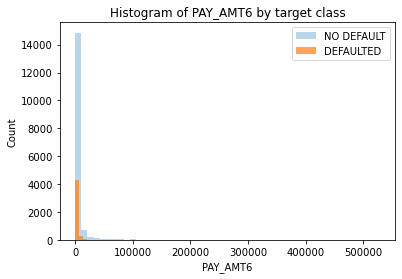

In [6]:
negative_examples = train_df.query('`default.payment.next.month` == 0')
positive_examples = train_df.query('`default.payment.next.month` == 1')

# print(positive_examples)

numeric_features = [
    "LIMIT_BAL",
    "AGE",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
]

for col in numeric_features:
    negative_col = negative_examples.loc[:, col]
    positive_col = positive_examples.loc[:, col]
    
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title("Histogram of " + col + " by target class")
    
    # added opacity to make graph look similar to the example histogram given above
    plt.hist(negative_col, label='NO DEFAULT', alpha=0.3, bins=50)
    plt.hist(positive_col, label='DEFAULTED', alpha=0.7, bins=50)
    
    plt.legend();
    plt.show()


The histograms above show no clear separation and relevance for the target (default vs no default). The shape of the distribution for both no default/default appear to be similar for all histograms. The counts themselves likely differ due to class imbalance.
NOTE: age seems to have a significant peak at age 31 for no default where as default has no such peaks, so that might be a useful distinguishing separator.

Text(0, 0.5, 'Number of People')

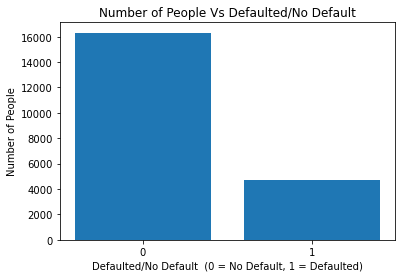

In [7]:
x = train_df["default.payment.next.month"].value_counts()
categories = list(x.keys())
count = list(x.values)

plt.bar(categories, count, tick_label=categories)

plt.title("Number of People Vs Defaulted/No Default")
plt.xlabel('Defaulted/No Default  (0 = No Default, 1 = Defaulted)')
plt.ylabel('Number of People')

This bar graph clearly shows class imbalance as there are roughly 16 000 no default samples where as there are about 4000 defaulted samples in training dataset. Thus, "Defaulted" samples only account for about 20% of the training dataset. 

The histograms show us that no none of the numeric features by themselves are relevant in determining the target of default or not default since the shape of both classes are very similar in all the numeric histograms above. However, this does not mean that any of these feature are useless, the features might be useful in conjunction with another feature for predicting the target. (just not by themselves).

The bar graph shows a problem of class imbalance as 20% of the samples are defaulted while 80% are not defaulted. Our machine learning model will become good at classifying examples as Not Defaulted and will not be good at classifying Defaulted samples since it learns from a disproportionate training set where it can achieve 80% accuracy by just predicting the majority value.

4) Since there is significant class imbalance, in order to use accuracy metric reliable, we will need to change the training procedure through class_weight="balanced". Otherwise, it is not good metric to choose right now since a dummy classifier can achieve a training score of about 80% by picking majority value.

I believe recall and precision are equally important, and therefore would also look at the F-1 metric. The recall score is important since we want to minimize False Negatives, as false negatives means we incorrectly predict people to not default, when in reality they will default. This is damaging to credit card companies since they will lose money. Precision is also important for minimizing false positives (where we incorrectly predict someone will default when they wont), as this means credit card companies would wrongfully not accept the business of such customers, thereby also losing money of potential customers who would pay their bills. In both cases, the credit card company is losing money.

<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [8]:
set_config(display="diagram")

# no imputation necessary
# scaling is necessary for numeric features
# one-hot encoding for MARRIAGE, PAY_0,2,3,4,5,6 (REPLACE number with categorical value also)
# ordinal encoding for EDUCATION and PAY?

# https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608
train_df_mod = train_df.copy()
train_df_mod["MARRIAGE"].replace({0:"Others", 1:"Married", 2:"Single", 3:"Divorce"}, inplace=True)
# print(train_df_mod["MARRIAGE"])


test_df_mod = test_df.copy()
test_df_mod["MARRIAGE"].replace({0:"Others", 1:"Married", 2:"Single", 3:"Divorce"}, inplace=True)
# print(test_df_mod["MARRIAGE"])



numeric_features = [
    "LIMIT_BAL",
    "AGE",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
]


ohe_categ_cols = ["MARRIAGE"]

drop_cols = []

preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(sparse=False, handle_unknown="ignore"), ohe_categ_cols),
    ("drop", drop_cols),
)

<br><br>

## 6. Baseline model <a name="6"></a>
<hr>

rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [9]:
# Taken from HW3
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [10]:
X_train = train_df_mod.drop(columns=["default.payment.next.month"])
X_test = test_df_mod.drop(columns=["default.payment.next.month"])

y_train = train_df_mod["default.payment.next.month"]
y_test = test_df_mod["default.payment.next.month"]

scoring = [
    "accuracy",
    "f1",
    "recall",
    "precision",
]

results = {}
dummy = DummyClassifier(strategy="most_frequent", random_state=123)
pipe_dummy = make_pipeline(preprocessor, dummy)
results["Dummy"] = mean_std_cross_val_scores(
    pipe_dummy, X_train, y_train, return_train_score=True, scoring=scoring
)

pd.DataFrame(results).T

/opt/miniconda3/envs/cpsc330/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/cpsc330/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/cpsc330/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/cpsc330/lib/python3.9/site-packages/sklearn/metrics/_cl

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
Dummy,0.018 (+/- 0.020),0.006 (+/- 0.001),0.777 (+/- 0.000),0.777 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)


In [11]:
C_vals = 10.0 ** np.arange(-2, 2, 0.5)


for C_val in C_vals:
    pipe_lr = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, class_weight="balanced", C=C_val, random_state=123))
    results["LogisticRegression with C value: " + str(C_val)] = mean_std_cross_val_scores(pipe_lr, X_train, y_train, cv=5, return_train_score=True, scoring=scoring)
    

pd.DataFrame(results).T


# mean_cv_score_arr = []
# mean_train_score_arr = []



# print(depths)

# for C_val in C_vals:
#     pipe_lr = make_pipeline(preprocessor, LogisticRegression(max_iter = 1000, C = C_val))
#     lr_cv_scores = cross_validate(pipe_lr, X_train, y_train, cv=5, return_train_score=True)
    
#     df_lr_cv_scores = pd.DataFrame(lr_cv_scores)
#     df_lr_scores_descript = df_lr_cv_scores.describe()
    
#     mean_cv_score_arr.append(df_lr_scores_descript.loc["mean", "test_score"])
#     mean_train_score_arr.append(df_lr_scores_descript.loc["mean", "train_score"])

    
# # graph the data
# plt.xlabel("C value")
# plt.ylabel("Score")
# plt.title("Score vs C value of 5-fold cross validation")
    
# plt.plot(mean_cv_score_arr, label='mean cv score')
# plt.plot(mean_train_score_arr, label='mean train score')
    
# plt.legend();
# plt.show()

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
Dummy,0.018 (+/- 0.020),0.006 (+/- 0.001),0.777 (+/- 0.000),0.777 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)
LogisticRegression with C value: 0.01,0.040 (+/- 0.004),0.007 (+/- 0.001),0.543 (+/- 0.003),0.544 (+/- 0.002),0.414 (+/- 0.007),0.416 (+/- 0.001),0.724 (+/- 0.016),0.727 (+/- 0.003),0.290 (+/- 0.004),0.291 (+/- 0.001)
LogisticRegression with C value: 0.03162277660168379,0.052 (+/- 0.003),0.006 (+/- 0.000),0.544 (+/- 0.003),0.544 (+/- 0.002),0.416 (+/- 0.007),0.415 (+/- 0.002),0.727 (+/- 0.016),0.726 (+/- 0.003),0.291 (+/- 0.004),0.291 (+/- 0.001)
LogisticRegression with C value: 0.1,0.063 (+/- 0.006),0.006 (+/- 0.001),0.545 (+/- 0.003),0.544 (+/- 0.002),0.416 (+/- 0.007),0.415 (+/- 0.002),0.728 (+/- 0.017),0.726 (+/- 0.004),0.292 (+/- 0.004),0.291 (+/- 0.002)
LogisticRegression with C value: 0.31622776601683794,0.075 (+/- 0.005),0.006 (+/- 0.001),0.544 (+/- 0.003),0.544 (+/- 0.002),0.416 (+/- 0.007),0.416 (+/- 0.002),0.727 (+/- 0.017),0.726 (+/- 0.004),0.291 (+/- 0.004),0.291 (+/- 0.002)
LogisticRegression with C value: 1.0,0.062 (+/- 0.008),0.006 (+/- 0.000),0.544 (+/- 0.003),0.544 (+/- 0.002),0.416 (+/- 0.007),0.416 (+/- 0.002),0.727 (+/- 0.017),0.726 (+/- 0.004),0.291 (+/- 0.004),0.291 (+/- 0.002)
LogisticRegression with C value: 3.1622776601683795,0.055 (+/- 0.004),0.006 (+/- 0.000),0.544 (+/- 0.003),0.544 (+/- 0.002),0.416 (+/- 0.007),0.416 (+/- 0.002),0.727 (+/- 0.017),0.726 (+/- 0.004),0.291 (+/- 0.004),0.291 (+/- 0.001)
LogisticRegression with C value: 10.0,0.058 (+/- 0.005),0.007 (+/- 0.001),0.544 (+/- 0.003),0.544 (+/- 0.002),0.415 (+/- 0.007),0.416 (+/- 0.002),0.726 (+/- 0.018),0.726 (+/- 0.004),0.291 (+/- 0.004),0.291 (+/- 0.002)
LogisticRegression with C value: 31.622776601683793,0.053 (+/- 0.003),0.006 (+/- 0.000),0.544 (+/- 0.004),0.544 (+/- 0.002),0.416 (+/- 0.007),0.416 (+/- 0.002),0.726 (+/- 0.018),0.726 (+/- 0.004),0.291 (+/- 0.004),0.291 (+/- 0.002)


The validation f1 scores are almost identical for all logistic regression models as being either 41.4, 41.5, or 41.6%. Therefore, I'll look at validation accuracy score to assess these. According to the results, all the C-value used (0.01, 0.03, 0.1, 0.3, 1, 3, 10, 31), the highest validation acciracy score is at 54.5% for C value = 0.1, while the train score is also at 54.4%. This likely indicates underfitting. Therefore, I will use the C-value tested: C=0.1 compared to the larger values, since we will benefit from a less complex model that will likely generalize better to unseen data and also because it has the highest f1 validation score of 41.6%.

<br><br>

## 8. Different classifiers <a name="8"></a>
<hr>
rubric={points:15}

**Your tasks:**
1. Try at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize your results. Can you beat logistic regression? 

In [12]:
# lgbm
# svm
# random forest

models = {
    "lgbm": LGBMClassifier(random_state=123, class_weight="balanced"),
    "SVM RBF": SVC(random_state=123, class_weight="balanced"),
    "random forest": RandomForestClassifier(random_state=123, n_jobs=-1, class_weight="balanced")
}


for name, model in models.items():
    pipe_model = make_pipeline(preprocessor, model)
    
    results[name] = mean_std_cross_val_scores(
        pipe_model, X_train, y_train, cv=5, return_train_score=True, scoring=scoring
    )
    
    
pd.DataFrame(results).T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
Dummy,0.018 (+/- 0.020),0.006 (+/- 0.001),0.777 (+/- 0.000),0.777 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)
LogisticRegression with C value: 0.01,0.040 (+/- 0.004),0.007 (+/- 0.001),0.543 (+/- 0.003),0.544 (+/- 0.002),0.414 (+/- 0.007),0.416 (+/- 0.001),0.724 (+/- 0.016),0.727 (+/- 0.003),0.290 (+/- 0.004),0.291 (+/- 0.001)
LogisticRegression with C value: 0.03162277660168379,0.052 (+/- 0.003),0.006 (+/- 0.000),0.544 (+/- 0.003),0.544 (+/- 0.002),0.416 (+/- 0.007),0.415 (+/- 0.002),0.727 (+/- 0.016),0.726 (+/- 0.003),0.291 (+/- 0.004),0.291 (+/- 0.001)
LogisticRegression with C value: 0.1,0.063 (+/- 0.006),0.006 (+/- 0.001),0.545 (+/- 0.003),0.544 (+/- 0.002),0.416 (+/- 0.007),0.415 (+/- 0.002),0.728 (+/- 0.017),0.726 (+/- 0.004),0.292 (+/- 0.004),0.291 (+/- 0.002)
LogisticRegression with C value: 0.31622776601683794,0.075 (+/- 0.005),0.006 (+/- 0.001),0.544 (+/- 0.003),0.544 (+/- 0.002),0.416 (+/- 0.007),0.416 (+/- 0.002),0.727 (+/- 0.017),0.726 (+/- 0.004),0.291 (+/- 0.004),0.291 (+/- 0.002)
LogisticRegression with C value: 1.0,0.062 (+/- 0.008),0.006 (+/- 0.000),0.544 (+/- 0.003),0.544 (+/- 0.002),0.416 (+/- 0.007),0.416 (+/- 0.002),0.727 (+/- 0.017),0.726 (+/- 0.004),0.291 (+/- 0.004),0.291 (+/- 0.002)
LogisticRegression with C value: 3.1622776601683795,0.055 (+/- 0.004),0.006 (+/- 0.000),0.544 (+/- 0.003),0.544 (+/- 0.002),0.416 (+/- 0.007),0.416 (+/- 0.002),0.727 (+/- 0.017),0.726 (+/- 0.004),0.291 (+/- 0.004),0.291 (+/- 0.001)
LogisticRegression with C value: 10.0,0.058 (+/- 0.005),0.007 (+/- 0.001),0.544 (+/- 0.003),0.544 (+/- 0.002),0.415 (+/- 0.007),0.416 (+/- 0.002),0.726 (+/- 0.018),0.726 (+/- 0.004),0.291 (+/- 0.004),0.291 (+/- 0.002)
LogisticRegression with C value: 31.622776601683793,0.053 (+/- 0.003),0.006 (+/- 0.000),0.544 (+/- 0.004),0.544 (+/- 0.002),0.416 (+/- 0.007),0.416 (+/- 0.002),0.726 (+/- 0.018),0.726 (+/- 0.004),0.291 (+/- 0.004),0.291 (+/- 0.002)
lgbm,0.152 (+/- 0.008),0.013 (+/- 0.001),0.714 (+/- 0.007),0.790 (+/- 0.003),0.478 (+/- 0.010),0.628 (+/- 0.005),0.586 (+/- 0.016),0.794 (+/- 0.012),0.403 (+/- 0.010),0.520 (+/- 0.005)


Yes, Logistic Regression can be beaten by both LGBM and Random Forest, as each have a higher validation f1 score and accuracy score. LGBM has the highest f1 validation score of 47.8% where as Random Forest has the highest cross-validation accuracy of 78.8%. Logistic Regression/SVM-RBF have comparable scores of about 54.5% accuracy and 42% f1 score. Note that LGBM has slightly longer fit_time than Logistic Regression, but shorter than Random Forest. SVM RBF has a similar validation score as Logisitc Regression but has a MUCH slower fit_time which means worse performance.


While random forest has the highest cross-validation accuracy, it also have the worst f1 score out of all the non-dummy models. Therefore, I will pick LGBM, because as argued previously, both precision/recall are important for a credit-card company, and this model provides the best f1-score along with the second best accuracy score.

<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:15}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. You may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

In [13]:

# # powers of 10
# sample_parameter_vals = list(10 ** np.arange(1, 4, 1))
# integersZeroToNine = list(range(0,10))
# integersOneToNine = list(range(1,10))
# integersTwoToNine = list(range(2,10))
# depths = list(range(0,15))


# sample_vals_concat_zero_plus =  integersZeroToNine + sample_parameter_vals
# sample_vals_concat_one_plus = integersOneToNine + sample_parameter_vals
# sample_vals_concat_two_plus = integersTwoToNine + sample_parameter_vals



# print(sample_vals_concat)

# # n_estimator_vals = np.logspace(-2, 2, 4)
# # learning_rate_vals = np.logspace(-2, 2, 4)
# # num_iterations_vals = np.logspace(-2, 2, 4)
# # depths = list(range(1,26))

# # C_vals = 10.0 ** np.arange(-2, 2, 0.5)


# # print(n_estimator_vals)
# # print(learning_rate_vals)


# param_grid = {
#     "lgbmclassifier__num_leaves": sample_vals_concat_two_plus, 
#     # "lgbmclassifier__min_data_in_leaf": sample_vals_concat_one_plus,
#    "lgbmclassifier__max_depth": depths,
#     "lgbmclassifier__n_estimators": sample_vals_concat_zero_plus, 
#     "lgbmclassifier__learning_rate": sample_vals_concat_one_plus,
    
# }

# # scoring="accuracy"

# pipe_lgbm = make_pipeline(preprocessor, LGBMClassifier(random_state=123))

# grid_search = GridSearchCV(pipe_lgbm, param_grid, cv=2, n_jobs=-1, return_train_score=True, scoring="f1")
# grid_search.fit(X_train,y_train)
# print(grid_search.best_score_)
# print(grid_search.best_params_)

In [77]:

# powers of 10
sample_parameter_vals = list(10 ** np.arange(1, 4, 1))
integersZeroToNine = list(range(0,10))
integersOneToNine = list(range(1,10))
integersTwoToNine = list(range(2,10))
depths = list(range(0,15))


sample_vals_concat_zero_plus =  integersZeroToNine + sample_parameter_vals
sample_vals_concat_one_plus = integersOneToNine + sample_parameter_vals
sample_vals_concat_two_plus = integersTwoToNine + sample_parameter_vals


param_grid = {
    # "lgbmclassifier__num_leaves": sample_vals_concat_two_plus, 
    # "lgbmclassifier__min_data_in_leaf": sample_vals_concat_one_plus,
   # "lgbmclassifier__max_depth": depths,
    "lgbmclassifier__n_estimators": sample_vals_concat_zero_plus, 
    "lgbmclassifier__learning_rate": sample_vals_concat_one_plus,
    
}


pipe_lgbm = make_pipeline(preprocessor, LGBMClassifier(random_state=123, class_weight="balanced"))

random_search = RandomizedSearchCV(pipe_lgbm, param_grid, cv=2, n_jobs=-1, return_train_score=True, scoring="f1")
random_search.fit(X_train,y_train)
print(random_search.best_score_)
print(random_search.best_params_)

0.4153679373237301
{'lgbmclassifier__n_estimators': 7, 'lgbmclassifier__learning_rate': 1000}


The best hyperparameters for LGBMClassifer: n_estimators = 9 and learning_rate = 2.

<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:15}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

In [78]:
import eli5
set_config(display="diagram")

pipe_lgbm_optimal = make_pipeline(preprocessor, LGBMClassifier(random_state=123, n_estimators=7, learning_rate=1000, class_weight="balanced"))

pipe_lgbm_optimal.fit(X_train, y_train)

ohe_columns = list(pipe_lgbm_optimal.named_steps["columntransformer"].named_transformers_['onehotencoder'].get_feature_names_out(ohe_categ_cols))


feature_names = numeric_features + ohe_columns


                                  
eli5.explain_weights(
    pipe_lgbm_optimal.named_steps["lgbmclassifier"], feature_names=feature_names
)


Weight,Feature
0.2166,LIMIT_BAL
0.2068,PAY_AMT1
0.1359,PAY_AMT2
0.1065,PAY_AMT3
0.0939,BILL_AMT2
0.0637,BILL_AMT3
0.0475,BILL_AMT4
0.0468,PAY_AMT4
0.0356,BILL_AMT5
0.0266,BILL_AMT6


LIMIT_BAL is considered the most important feature for determining the target, followed by PAY_AMT1, then PAY_AMT2, and so on. AGE, PAY_AMT6, and all the Marital status values are considered useless by themselves in determining the target since they have a weight of 0.

<br><br>

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

In [79]:
pipe_lgbm_optimal.score(X_test, y_test)

0.7108888888888889

The test accuracy score is 71%. The validation accuracy score was also 71.4%. Therefore, the test score agrees well with the validation score, indicating that our model is likely trustworthy in its predictive ability, and does not suffer from optimization bias.

I decided to use class_weight="balanced" for every estimator, it is possible there might be a custom weight value that would be even more optimized to avoid potential optimization bias. I think the LGBM model is likely underfitting since the training score is only about 79%, so perhaps there are other hyperparameter values that will result in a more optimized model.

<br><br>

## (Optional) 13. Explaining predictions 
rubric={points:1}

**Your tasks**

1. Take one or two test predictions and explain them with SHAP force plots.  

<br><br>

## 14. Summary of results <a name="13"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Report your final test score along with the metric you used. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

1) The final test score is 71% and the metric used was accuracy.

2) I am surprised that my LGBM model determined that AGE has a weight of 0 in determining default/no default. 
I would have thought people who are working between 25-60 are likely to have no default, where as other age groups would have default. 
Perhaps this dataset mostly contained data for people between 25-60, and therefore this logical distinction was not learned.

Otherwise, I am happy with the results, it has a test score of 71% which highly agrees with the validation score of 71%, indicating that there is very little optimization bias.

3) While I used class_weight="balanced", perhaps I could have tested various values for this field during hyperparameter optimization to find the optimal f1 score, 
to further optimize this model and likely achieve a higher test score.

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 